# 부동산 매매가격지수, 전세가격지수, 거래량 Scatter Plot

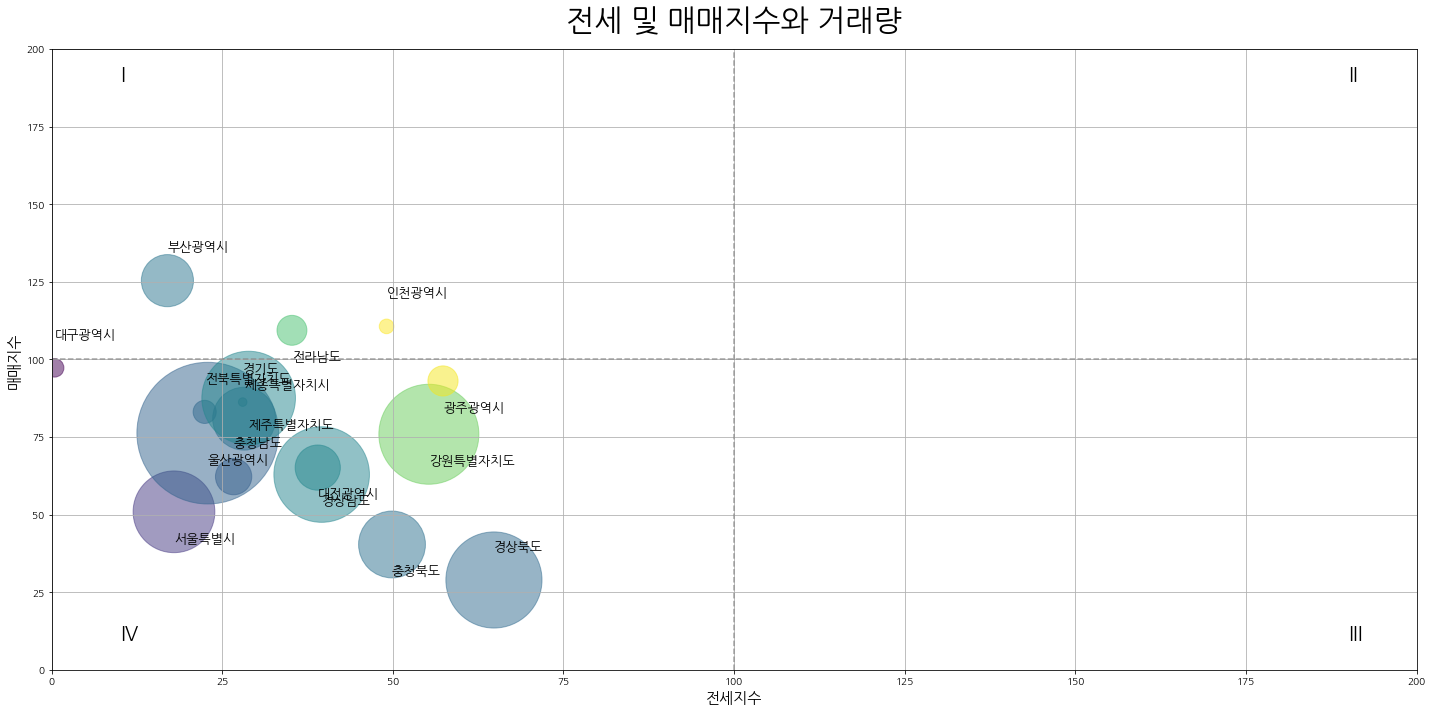

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'NanumGothic'
# 대한민국 18개 시도 리스트
sido_list = [
    "강원특별자치도",
    "경기도",
    "경상남도",
    "경상북도",
    "광주광역시",
    "대구광역시",
    "대전광역시",
    "부산광역시",
    "서울특별시",
    "세종특별자치시",
    "울산광역시",
    "인천광역시",
    "전라남도",
    "전북특별자치도",
    "제주특별자치도",
    "충청남도",
    "충청북도"
]

# 정규 분포를 따르는 데이터 생성
np.random.seed(0)  # 랜덤 시드 고정

mean_x = 20
std_dev = 20
x = np.random.normal(loc=mean_x, scale=std_dev, size=len(sido_list))

mean_y = 80
y = np.random.normal(loc=mean_y, scale=std_dev, size=len(sido_list))

# 가격 데이터 스케일 조정
price_data = np.column_stack((x, y, np.random.rand(len(sido_list)) * 1000))  # 거래량은 랜덤 값으로 생성

# Marker size in units of points^2
volume = (100 * price_data[:, 2] / price_data[:, 2][0])**2
close = 0.003 * price_data[:, 1] / 0.003 * price_data[:, 0]

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(price_data[:, 0], price_data[:, 1], c=close, s=volume, alpha=0.5)

   
for i, txt in enumerate(sido_list):
    # 라벨이 겹치지 않도록 약간의 이동
    if i % 2 == 0:
        ax.annotate(txt, (price_data[i, 0], price_data[i, 1]), fontsize=13, color='black', xytext=(0, -30),
                    textcoords='offset points')  
    else:
        ax.annotate(txt, (price_data[i, 0], price_data[i, 1]), fontsize=13, color='black', xytext=(0, 30),
                    textcoords='offset points')
# for i, txt in enumerate(sido_list):
#     ax.annotate(txt, (price_data[i, 0], price_data[i, 1]), fontsize=12, color='black')  # 라벨 폰트 색상을 회색으로 지정

ax.set_xlabel(r'전세지수', fontsize=15)
ax.set_ylabel(r'매매지수', fontsize=15)
ax.set_title('전세 및 매매지수와 거래량', fontsize=30, pad=20)


# 사분면을 나타내기 위한 점선
ax.axhline(y=100, linestyle='--', color='gray', alpha=0.7)
ax.axvline(x=100, linestyle='--', color='gray', alpha=0.7)

# 사분면 I, II, III, IV 표시
ax.text(10, 190, 'I', fontsize=20)
ax.text(190, 190, 'II', fontsize=20)
ax.text(190, 10, 'III', fontsize=20)
ax.text(10, 10, 'IV', fontsize=20)

# x와 y의 리미트 설정
ax.set_xlim(0, 200)
ax.set_ylim(0, 200)

ax.grid(True)
fig.tight_layout()

plt.show()
